In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
climate = pd.read_csv('climate.csv', sep='\t')
deliveries = pd.read_csv('deliveries.csv', sep='\t')
yields = pd.read_csv('yields.csv', sep='\t')

In [3]:
print('Size of climate.csv:', climate.shape)
print('Size of deliveries.csv:', deliveries.shape)
print('Size of yields.csv:', yields.shape)

Size of climate.csv: (6160989, 26)
Size of deliveries.csv: (194275, 8)
Size of yields.csv: (9434, 4)


In [4]:
climate.head()

,pblk,day,ddays50,ddays50_97,ddays97,precip_intensity,precip_intensity_adj,meantemp,mintemp,mintemp_time,...,sunset_temp,dew_point,wind_speed,wind_bearing,pressure,cloud_cover,lat,long,region,region_consolidated
0,100013,2011-01-24 00:00:00,0.42,0.42,0.00,0.0092,0.0092,44.19,38.24,2011-01-24 02:00:00,...,50.47,42.68,0.55,223,1021.41,0.62,2580.4751,-8409.4591,MADERA,FRES
1,100013,2011-12-19 00:00:00,0.41,0.41,0.00,0.0000,0.0000,40.13,32.65,2011-12-19 04:00:00,...,49.12,35.74,0.68,95,1018.84,0.20,2580.4751,-8409.4591,MADERA,FRES
2,100013,2003-09-13 01:00:00,29.66,25.66,0.09,0.0000,0.0000,79.66,64.10,2003-09-13 08:00:00,...,83.27,52.19,4.08,308,1008.79,0.02,2580.4751,-8409.4591,MADERA,FRES
3,100013,1998-04-14 01:00:00,2.26,2.26,0.00,0.0000,0.0000,49.25,39.70,1998-04-14 08:00:00,...,52.91,39.22,5.48,301,1016.50,0.52,2580.4751,-8409.4591,MADERA,FRES
4,100013,1999-01-29 00:00:00,0.81,0.81,0.00,0.0000,0.0000,42.13,30.46,1999-01-29 07:00:00,...,50.17,36.86,3.25,122,1023.78,0.10,2580.4751,-8409.4591,MADERA,FRES


In [5]:
deliveries.head()

,weighttagno,tagyear,siteno,programno,crushdate,brix,tons,pblk
0,792954,1,8,GTV177CAL,08/08/01,20.400000,1.8459,111735
1,792963,1,8,GTV177CAL,08/08/01,20.200001,1.7955,111735
2,792967,1,8,GTV177CAL,08/08/01,19.700001,1.7752,111735
3,792972,1,8,GTV177CAL,08/08/01,19.900000,1.8914,111735
4,792980,1,8,GTV177CAL,08/08/01,19.600000,1.7395,111735


In [6]:
yields.head()

,pblk,crop_year,tons,acres
0,100013,2000,28.0987,2.8000
1,100013,2001,24.8185,2.8000
2,100013,2002,27.7305,2.8000
3,100013,2003,25.5024,2.7993
4,100013,2004,19.7302,2.8000


In [7]:
print('Columns in climate.csv:', climate.columns)

Columns in climate.csv: Index(['pblk', 'day', 'ddays50', 'ddays50_97', 'ddays97', 'precip_intensity',
       'precip_intensity_adj', 'meantemp', 'mintemp', 'mintemp_time',
       'maxtemp', 'maxtemp_time', 'humidity', 'sunrise_time', 'sunrise_temp',
       'sunset_time', 'sunset_temp', 'dew_point', 'wind_speed', 'wind_bearing',
       'pressure', 'cloud_cover', 'lat', 'long', 'region',
       'region_consolidated'],
      dtype='object')


In [8]:
deliveries.describe()

,weighttagno,tagyear,siteno,brix,tons,pblk
count,194275.000000,194275.000000,194275.000000,194275.000000,194275.000000,194275.000000
mean,378556.110905,8.373383,5.274513,23.138915,1.671112,117453.354719
std,265133.039422,3.905082,2.987422,2.298887,0.187526,11694.808470
min,100003.000000,1.000000,2.000000,0.000000,0.071400,100013.000000
25%,178114.000000,5.000000,2.000000,21.500000,1.607200,110012.000000
50%,286709.000000,9.000000,8.000000,23.600000,1.693300,114593.000000
75%,423017.500000,12.000000,8.000000,24.799999,1.769600,129761.000000
max,909777.000000,14.000000,8.000000,35.200001,2.739100,142097.000000


In [9]:
deliveries['programno'].unique()

array(['GTV177CAL ', 'EJG101CAL ', 'TLV101CAL ', 'TLV005CAL ',
       'SVL101CAL ', 'CHP101CAL ', 'TLV178CAL ', 'GTV178CAL ',
       'BAL104CAL ', 'EJG101CALS', 'GTV005CAL ', 'RWC005CAL ',
       'TLV006CAL ', 'GLC101CAL ', 'SVL010CAL ', 'SVL176CAL ',
       'GBV005CAL ', 'CHP100CAL ', 'RWC101CAL ', 'GBV005CALS',
       'TLV002CAL ', 'GBV005CALN', 'GBV101CAL ', 'TLV009CAL ',
       'BWS009CAL ', 'DMT961CAL ', 'BWS103SVL ', 'SVL103CAL ',
       'SVL002CAL ', 'GBD504CAL ', 'MPC004CAL ', 'GTV002CAL ',
       'RWC002CAL ', 'BWA002CAL ', 'GLC312CAL ', 'BWD103SVL ',
       'CNC504CAL ', 'GLC002CAL ', 'TLR002SON ', 'GLC178CAL ',
       'GLC005CAL ', 'TLV101CALN', 'SVL005CAL ', 'GTV005CALK',
       'GTV005CALF', 'GTV005CALS', 'GTV005CALN', 'GWN005PRB ',
       'DBL010CAL ', 'GBD206CAL ', 'GLC005CALR', 'GLC005CALD',
       'PRS101CAL ', 'GEN005CAL ', 'GLC005CALT', 'GSC005SON ',
       'GEN009CAL ', 'WVN406CAL ', 'LME005MMR ', 'GTV009CALN',
       'GLC005CALF', 'RWC009CAL ', 'VAL009CAL ', 'GWN00

In [10]:
print('The number of vineyard:', climate['pblk'].unique().shape[0])

The number of vineyard: 803


In [11]:
deliveries[deliveries['brix'] == 0].shape

(14, 8)

In [12]:
deliveries.columns

Index(['weighttagno', 'tagyear', 'siteno', 'programno', 'crushdate', 'brix',
       'tons', 'pblk'],
      dtype='object')

In [13]:
deliveries['tagyear'] = deliveries['tagyear'].astype('object')
deliveries['siteno'] = deliveries['siteno'].astype('object')
deliveries['pblk'] = deliveries['pblk'].astype('object')

In [14]:
deliveries['tagyear'].describe()

count     194275
unique        14
top            9
freq       19076
Name: tagyear, dtype: int64

In [15]:
deliveries['siteno'].describe()

count     194275
unique         2
top            8
freq      106026
Name: siteno, dtype: int64

In [16]:
deliveries['pblk'].describe()

count     194275
unique       803
top       102411
freq        3438
Name: pblk, dtype: int64

# weighttagno: delivery load id

### deliveries['weighttagno'] = deliveries['weighttagno'].astype('str')
deliveries['weighttagno'].describe()

In [79]:
deliveries[deliveries['weighttagno'] == '146666'].head()

/Users/Fan/anaconda/envs/python35/lib/python3.5/site-packages/pandas/core/ops.py:716: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

WEIRD!!!!!

# tagyear: year of delivery

In [13]:
deliveries['tagyear'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# siteno: site load delivered to

In [14]:
deliveries['siteno'].describe()

count    194275.000000
mean          5.274513
std           2.987422
min           2.000000
25%           2.000000
50%           8.000000
75%           8.000000
max           8.000000
Name: siteno, dtype: float64

# brix

In [15]:
deliveries['brix'].describe()

count    194275.000000
mean         23.138915
std           2.298887
min           0.000000
25%          21.500000
50%          23.600000
75%          24.799999
max          35.200001
Name: brix, dtype: float64

In [16]:
brix0 = deliveries[deliveries['brix'] == 0]
print(brix0.shape)
brix0

(14, 8)


,weighttagno,tagyear,siteno,programno,crushdate,brix,tons,pblk
1278,797639,1,8,EJG101CAL,08/23/01,0.0,0.7322,101643
1289,798024,1,8,RWC005CAL,08/24/01,0.0,1.4042,114401
11603,823709,2,8,TLV002CALH,10/23/02,0.0,1.8641,114595
12851,829176,3,8,GLC101CAL,09/06/03,0.0,1.5722,101669
18550,843315,4,8,FRU101LOD,08/11/04,0.0,1.4819,102498
18594,843421,4,8,EJG101CAL,08/12/04,0.0,1.6506,100839
18907,844298,4,8,GLC101CAL,08/14/04,0.0,1.8277,101636
29360,872306,5,8,GLC005CAL,10/22/05,0.0,1.8697,101662
30201,873672,5,8,GLC005CAL,10/28/05,0.0,1.5176,117027
32021,882238,6,8,VAL101CAL,09/07/06,0.0,1.8319,101626


# tons: tons of delivered load

In [17]:
deliveries['tons'].describe()

count    194275.000000
mean          1.671112
std           0.187526
min           0.071400
25%           1.607200
50%           1.693300
75%           1.769600
max           2.739100
Name: tons, dtype: float64

# pblk: vineyard id

In [18]:
deliveries['pblk'].describe()

count    194275.000000
mean     117453.354719
std       11694.808470
min      100013.000000
25%      110012.000000
50%      114593.000000
75%      129761.000000
max      142097.000000
Name: pblk, dtype: float64

# programno: wine type ( TTTVVVLLL) TTT - tier, VVV - varietal, LLL - origin

In [19]:
deliveries['programno'] = deliveries['programno'].astype('str')
deliveries['programno'].describe()

count         194275
unique           284
top       JCE201CAL 
freq           26346
Name: programno, dtype: object

In [20]:
deliveries['tier'] = deliveries['programno'].apply(lambda x: x[:3])
deliveries['varietal'] = deliveries['programno'].apply(lambda x: x[3:6])
deliveries['origin'] = deliveries['programno'].apply(lambda x: x[6:])
print(deliveries['tier'].describe())
print(deliveries['varietal'].describe())
print(deliveries['origin'].describe())

count     194275
unique        81
top          JCE
freq       29594
Name: tier, dtype: object
count     194275
unique        50
top          101
freq       42122
Name: varietal, dtype: object
count     194275
unique        29
top         CAL 
freq      141899
Name: origin, dtype: object


In [21]:
varietal = deliveries['varietal'].unique()
varietal

array(['177', '101', '005', '178', '104', '006', '010', '176', '100',
       '002', '009', '961', '103', '504', '004', '312', '206', '406',
       '290', '106', '323', '201', '030', '107', '327', '341', '011',
       '050', '308', '008', '033', '032', '326', '200', '118', '001',
       '116', '048', '026', '105', '044', '337', '320', '319', '102',
       '325', '339', '180', '303', '485'], dtype=object)

In [22]:
deliveries['varietal'] = deliveries['varietal'].astype(int)

In [23]:
# Top 10 varietal every year and how much they account for
groups = deliveries.groupby('year')
for year, df in groups:
    v_tons = pd.DataFrame(columns=['varietal', 'tons'])
    v_groups = df.groupby('varietal')
    i = 0
    for varietal, d in v_groups:
        v_tons.loc[i] = [varietal, d['tons'].sum()]
        i += 1
    total_tons = v_tons['tons'].sum()
    v_tons['perc'] = v_tons['tons'] / total_tons
    v_tons = v_tons.sort_values('perc', ascending=False)
    print(v_tons.head(10))

KeyError: 'year'

In [25]:
s = set()
sub = deliveries[deliveries['varietal'] == 103]
for item in sub['pblk'].unique().tolist():
    s.add(item)

varietals = [2, 5, 101, 201]
s_next = set()
for varietal in varietals:
    sub = deliveries[deliveries['varietal'] == varietal]
    for item in sub['pblk'].unique().tolist():
        s_next.add(item)
    s = s.intersection(s_next)
    
print(s)

{102620}


# crushdate: date of delivery

In [26]:
deliveries['crushdate'] = pd.to_datetime(deliveries['crushdate'], infer_datetime_format=True)

In [27]:
deliveries['crushdate'].describe()

count                  194275
unique                    986
top       2010-10-28 00:00:00
freq                      454
first     2001-08-08 00:00:00
last      2014-10-30 00:00:00
Name: crushdate, dtype: object

In [28]:
deliveries['year'] = deliveries['crushdate'].apply(lambda x: x.year).astype(int)
deliveries['month'] = deliveries['crushdate'].apply(lambda x: x.month).astype(int)
deliveries['day'] = deliveries['crushdate'].apply(lambda x: x.day).astype(int)

In [29]:
deliveries['dayofweek'] = deliveries['crushdate'].apply(lambda x: x.dayofweek).astype(str)

In [30]:
deliveries['dayofweek'].describe()

count     194275
unique         7
top            3
freq       32712
Name: dayofweek, dtype: object

In [31]:
deliveries['month'].describe()

count    194275.000000
mean          9.293584
std           0.732184
min           7.000000
25%           9.000000
50%           9.000000
75%          10.000000
max          10.000000
Name: month, dtype: float64

Total tonnage of grapes delivered each year:
year 2001 : 14997.081750000001
year 2002 : 18106.303599999996
year 2003 : 17390.05135
year 2004 : 17750.947549999993
year 2005 : 18602.223150000005
year 2006 : 14920.5917
year 2007 : 22423.806825000003
year 2008 : 25434.01875000001
year 2009 : 32130.611099999995
year 2010 : 27773.470899999997
year 2011 : 26874.837885
year 2012 : 30110.887905000003
year 2013 : 30974.074249999994
year 2014 : 27166.346619999997


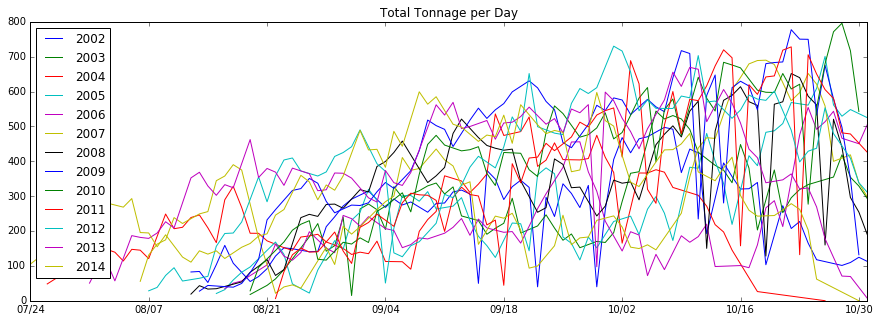

In [32]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(15,5))
#data = deliveries[deliveries['tier'] == 'JCE']
#data = deliveries[deliveries['pblk'] == 102620]
#groups = data.groupby(['year'])
groups = deliveries.groupby(['year'])
print('Total tonnage of grapes delivered each year:')
for key, df in groups:
    tons_per_day = pd.DataFrame(columns=['date', 'tons'])
    g = df.groupby(['month', 'day'])
    i = 0
    for k, d in g:
        tons_per_day.loc[i] = [pd.to_datetime(str(k[0]) + '/' + str(k[1]), format='%m/%d'), d['tons'].sum()]
        i += 1
    print('year', key ,':', tons_per_day['tons'].sum())
    if key >= 2002:
        plt.plot(tons_per_day['date'], tons_per_day['tons'], label=key)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.legend(loc='upper left')
plt.title('Total Tonnage per Day')
plt.show()

In [33]:
deliveries[(deliveries['year'] == 2014) & (deliveries['month'] == 8)]['tons'].sum()

5889.537150000004

In [34]:
deliveries[(deliveries['year'] == 2011) & (deliveries['pblk'] == 100094)]['tons'].sum()

12.790400000000002

In [35]:
total_ton = pd.DataFrame(columns=['pblk', 'tons'])
groups = deliveries.groupby('pblk')
i = 0
for pblk, df in groups:
    total_ton.loc[i] = [pblk, df['tons'].sum()]
    i += 1

total_ton.sort_values('tons')
total_ton.head()

,pblk,tons
0,100013.0,276.74500
1,100015.0,122.54830
2,100024.0,121.19310
3,100055.0,51.24245
4,100089.0,36.36850


In [36]:
deliveries[deliveries['pblk'] == 102411]['varietal'].describe()

count    3438.000000
mean      213.013962
std       180.516434
min        50.000000
25%       103.000000
50%       103.000000
75%       504.000000
max       504.000000
Name: varietal, dtype: float64

# More on brix

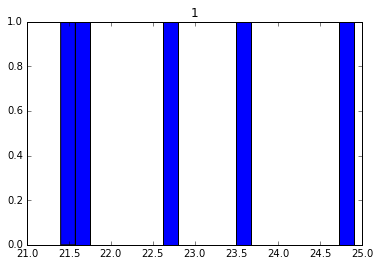

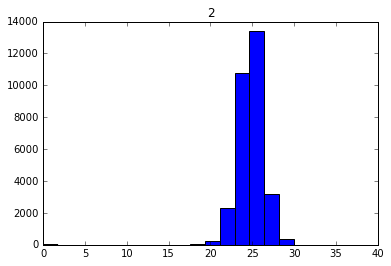

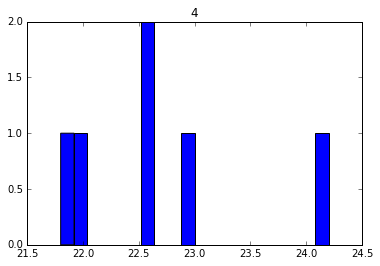

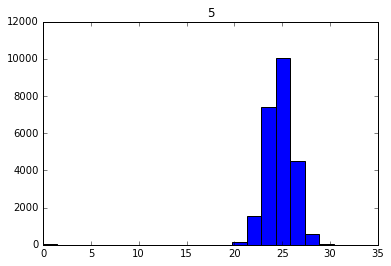

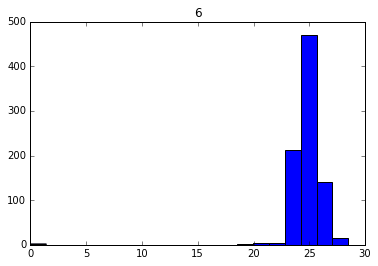

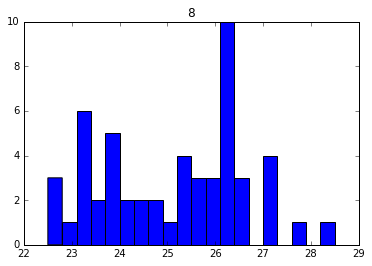

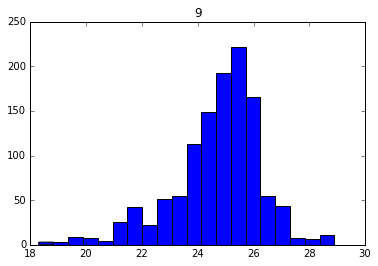

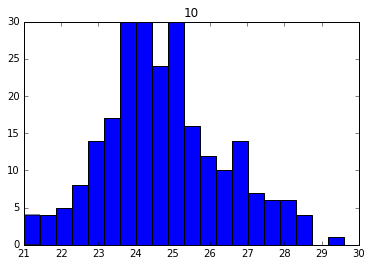

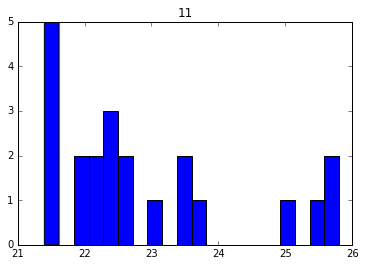

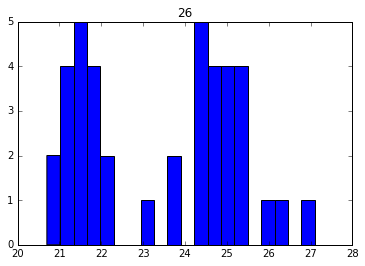

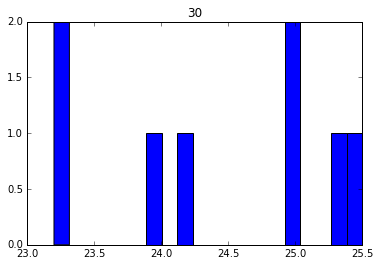

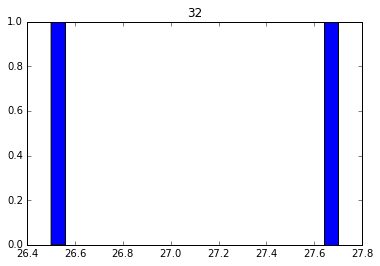

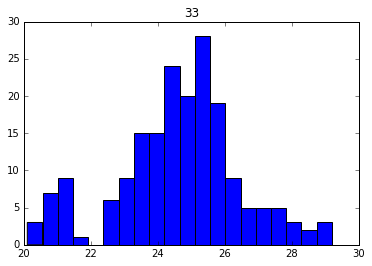

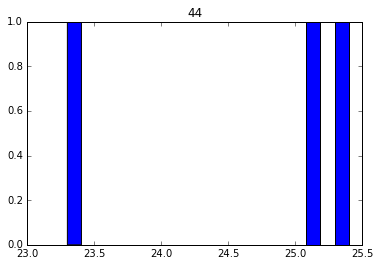

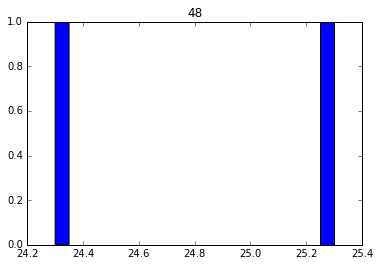

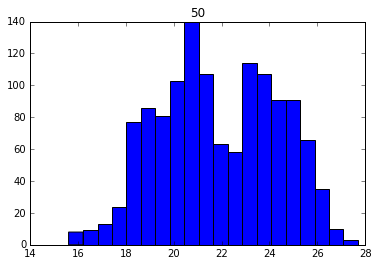

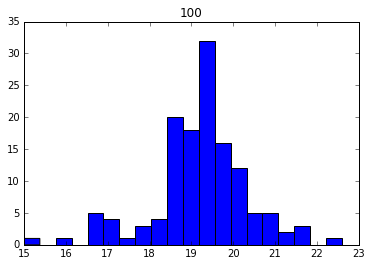

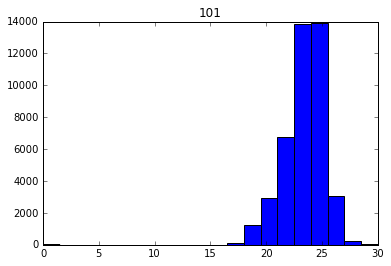

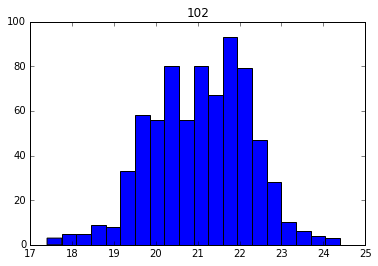

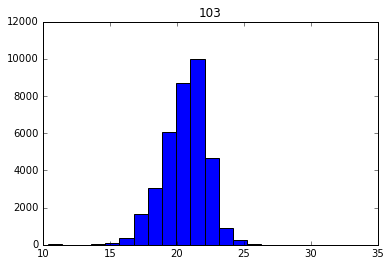

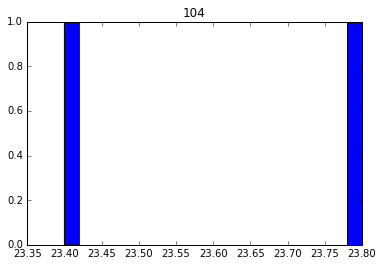

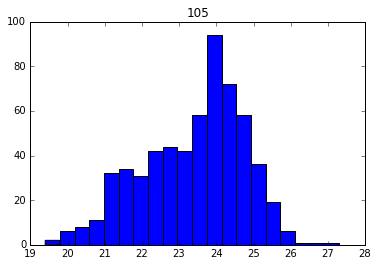

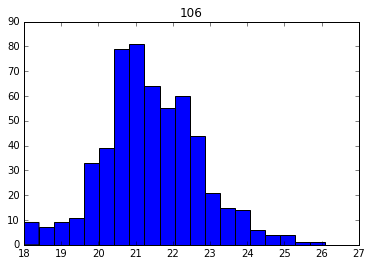

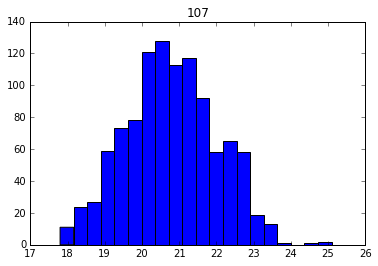

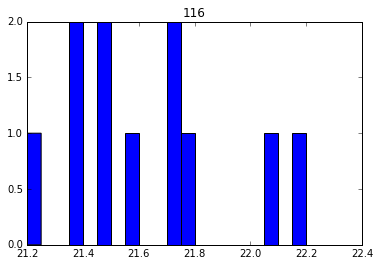

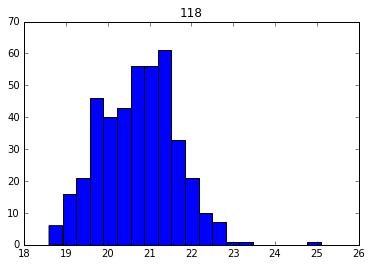

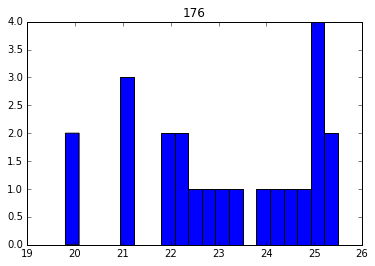

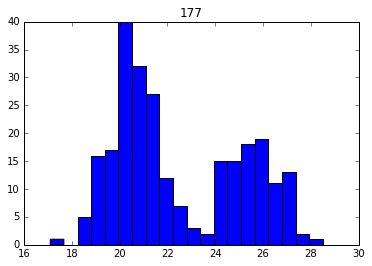

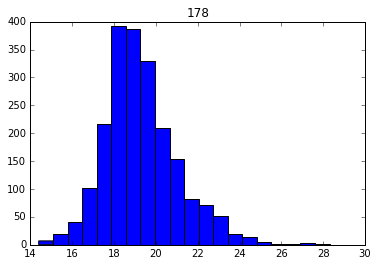

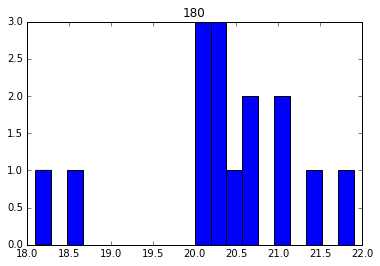

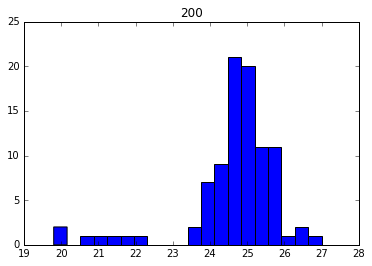

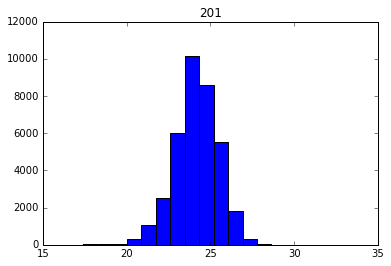

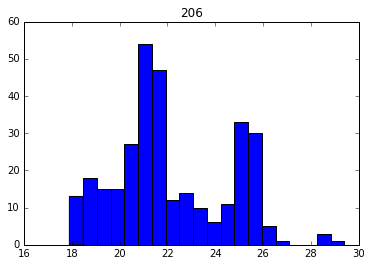

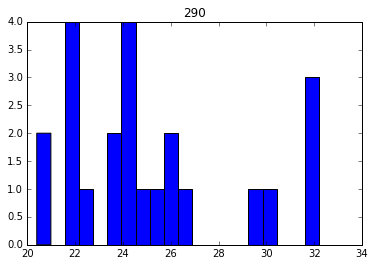

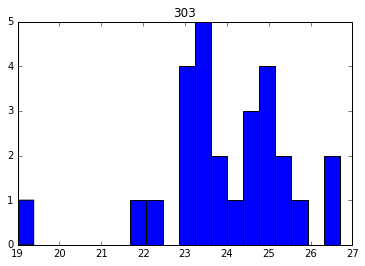

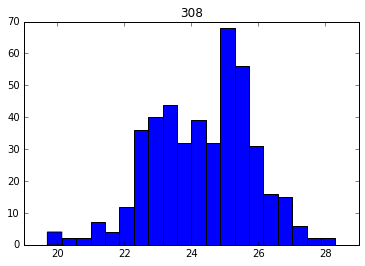

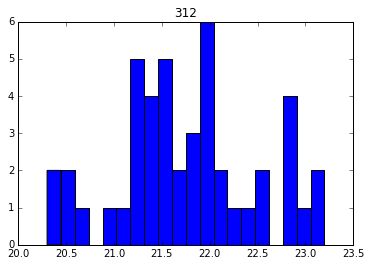

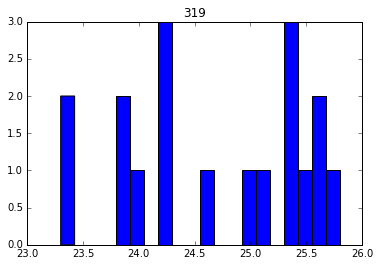

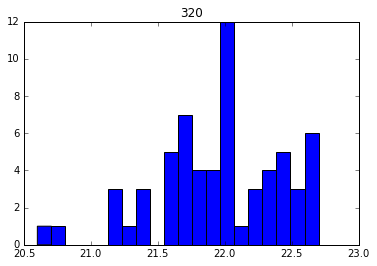

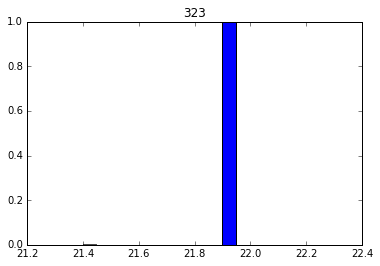

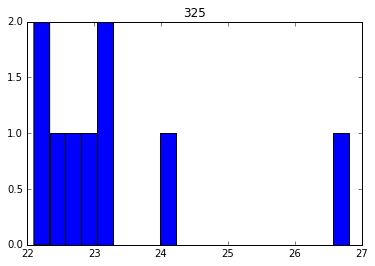

In [37]:
varietals = deliveries.groupby(['varietal'])
count = 0
for varietal, df in varietals:
    count += 1
    plt.hist(df['brix'], 20)
    plt.title(varietal)
    #plt.ylim(15, 36)
    plt.show()
    if count > 40:
        break

# Climate

In [38]:
climate.columns

Index(['pblk', 'day', 'ddays50', 'ddays50_97', 'ddays97', 'precip_intensity',
       'precip_intensity_adj', 'meantemp', 'mintemp', 'mintemp_time',
       'maxtemp', 'maxtemp_time', 'humidity', 'sunrise_time', 'sunrise_temp',
       'sunset_time', 'sunset_temp', 'dew_point', 'wind_speed', 'wind_bearing',
       'pressure', 'cloud_cover', 'lat', 'long', 'region',
       'region_consolidated'],
      dtype='object')

In [39]:
for column in climate.columns.tolist():
    print(column, ':')
    print(climate[column].describe())

pblk :
count    6.160989e+06
mean     1.178628e+05
std      1.252875e+04
min      1.000130e+05
25%      1.048420e+05
50%      1.161460e+05
75%      1.304950e+05
max      1.420970e+05
Name: pblk, dtype: float64
day :
count                 6160989
unique                   7678
top       2000-01-01 00:00:00
freq                     1607
Name: day, dtype: object
ddays50 :
count    6.160989e+06
mean     1.311684e+01
std      1.045189e+01
min      0.000000e+00
25%      3.550000e+00
50%      1.107000e+01
75%      2.164000e+01
max      4.948000e+01
Name: ddays50, dtype: float64
ddays50_97 :
count    6.160989e+06
mean     1.243074e+01
std      9.359607e+00
min      0.000000e+00
25%      3.550000e+00
50%      1.107000e+01
75%      2.119000e+01
max      3.869000e+01
Name: ddays50_97, dtype: float64
ddays97 :
count    6.160989e+06
mean     4.099264e-02
std      2.128329e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.640000e+00
Name: ddays97, 

In [40]:
climate['day'] = pd.to_datetime(climate['day'])

In [41]:
climate['day'].unique().shape

(7678,)

This climate data contains records from 1995-01-01 to 2016-01-01 everyday. And roughly, every vineyard has all the records from all days.

In [42]:
climate['year'] = climate['day'].apply(lambda x: x.year).astype(int)
climate['month'] = climate['day'].apply(lambda x: x.month).astype(int)

In [43]:
group_vineyard = deliveries.groupby('pblk').size().sort_values(ascending=False)
top_vineyard = group_vineyard[:3].index.tolist()

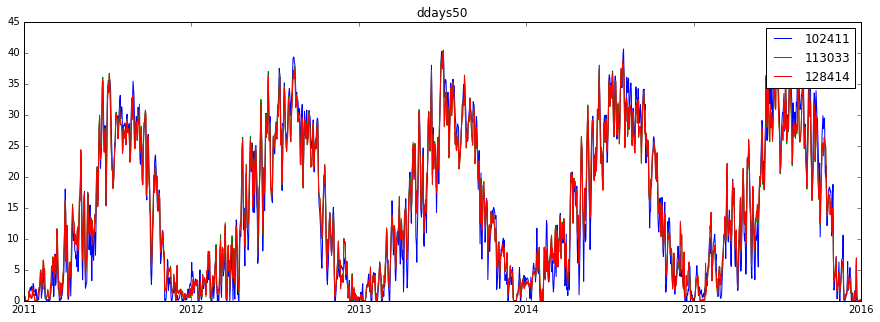

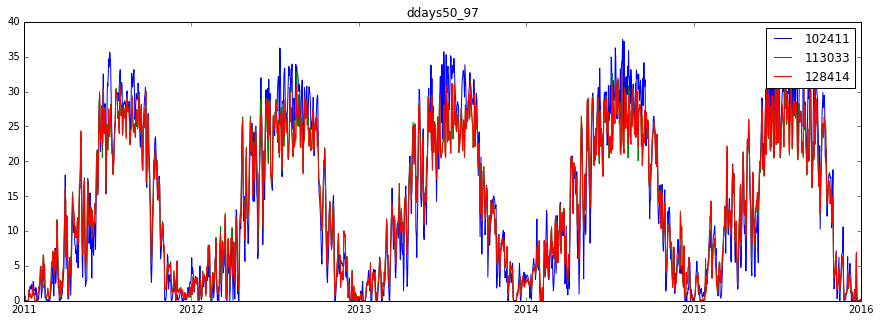

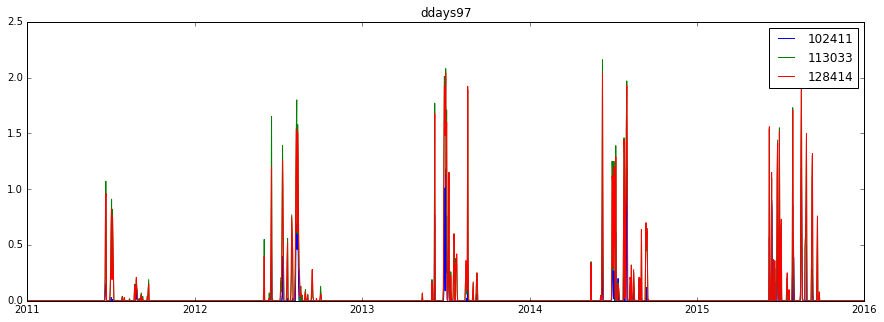

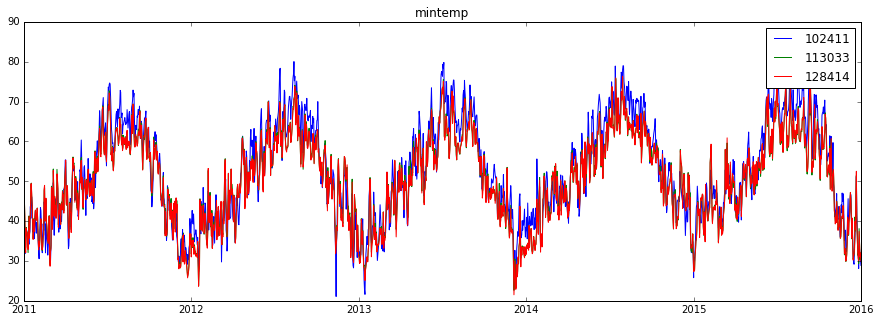

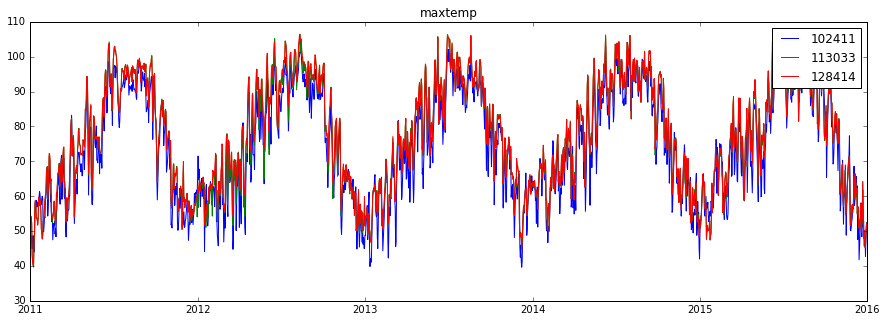

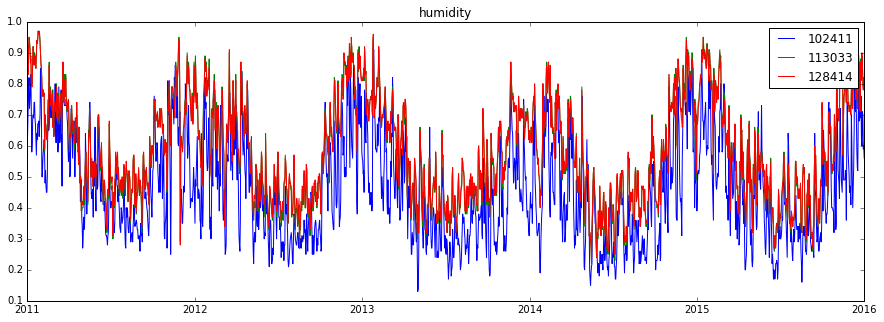

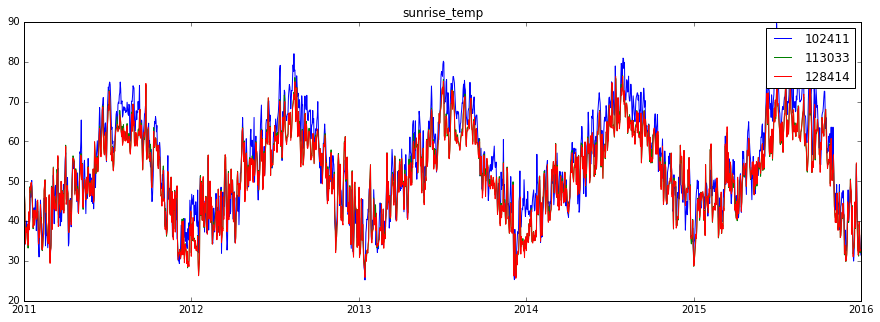

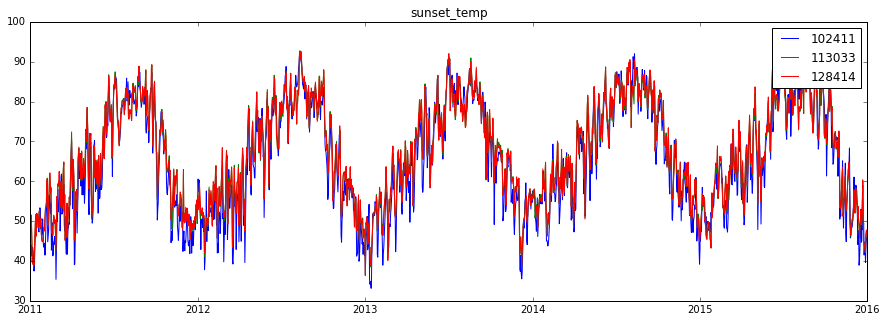

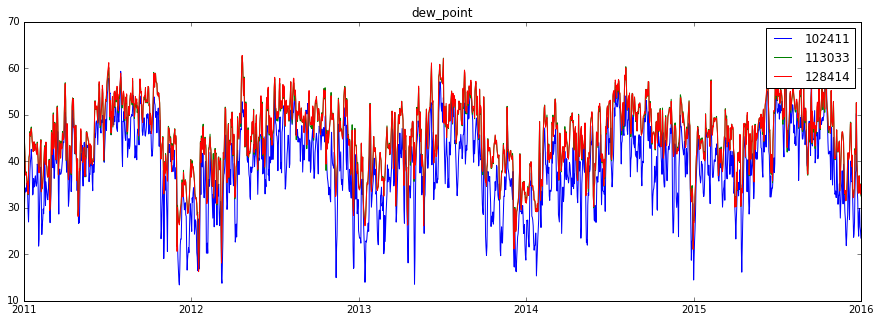

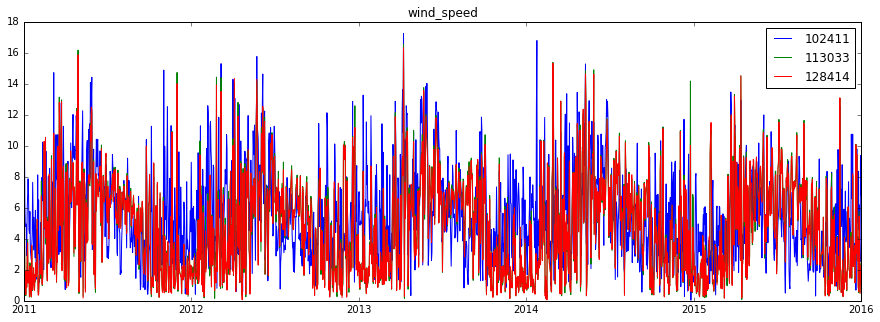

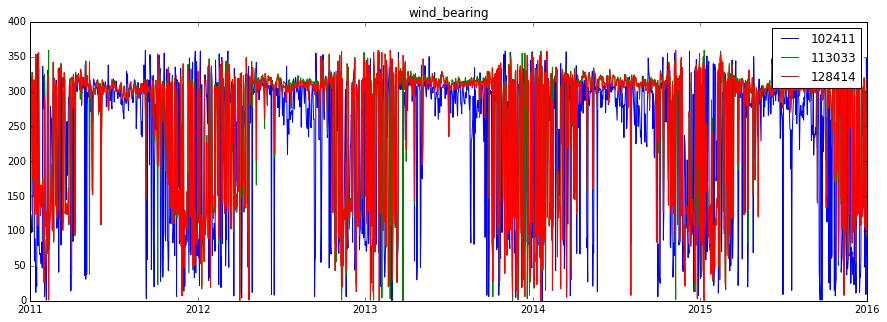

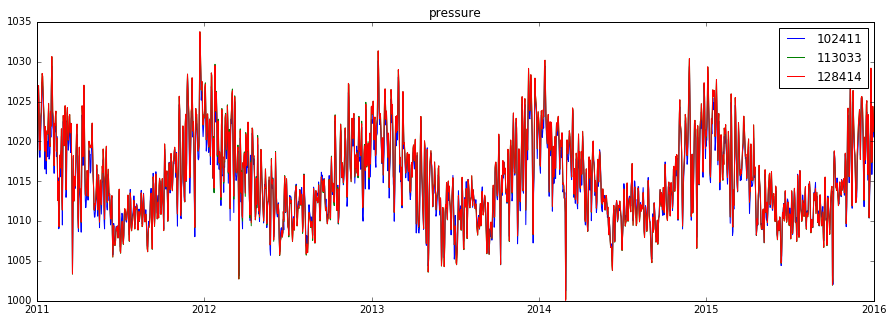

In [44]:
feature = ['ddays50', 'ddays50_97', 'ddays97', 'mintemp', 'maxtemp', 'humidity', 'sunrise_temp', 'sunset_temp', 
           'dew_point', 'wind_speed', 'wind_bearing', 'pressure']

for item in feature:
    fig = plt.figure(figsize=(15,5))
    for vineyard in top_vineyard:
        sub = climate[(climate['pblk'] == int(vineyard)) & (climate['year'] > 2010)]
        sub = sub.sort_values('day')
        plt.plot(sub['day'], sub[item], label=vineyard)

    plt.title(item)
    plt.legend()
    plt.show()

In [45]:
climate['ddays50'].describe()

count    6.160989e+06
mean     1.311684e+01
std      1.045189e+01
min      0.000000e+00
25%      3.550000e+00
50%      1.107000e+01
75%      2.164000e+01
max      4.948000e+01
Name: ddays50, dtype: float64

In [46]:
locations = climate.groupby('pblk')
vineyard_location = pd.DataFrame(columns=['vineyard', 'long', 'lat'])
i = 0
for location, df in locations:
    if location in top_vineyard:
        print(df['long'].describe())
        print(df['lat'].describe())
    vineyard_location.loc[i] = [location, df['long'].min()/69.75, df['lat'].min()/69.75]
    i += 1

count    7.673000e+03
mean    -8.325633e+03
std      1.726333e-09
min     -8.325633e+03
25%     -8.325633e+03
50%     -8.325633e+03
75%     -8.325633e+03
max     -8.325633e+03
Name: long, dtype: float64
count    7.673000e+03
mean     2.468046e+03
std      8.276941e-11
min      2.468046e+03
25%      2.468046e+03
50%      2.468046e+03
75%      2.468046e+03
max      2.468046e+03
Name: lat, dtype: float64
count    7.673000e+03
mean    -8.421548e+03
std      6.366878e-10
min     -8.421548e+03
25%     -8.421548e+03
50%     -8.421548e+03
75%     -8.421548e+03
max     -8.421548e+03
Name: long, dtype: float64
count    7.673000e+03
mean     2.581249e+03
std      3.529069e-10
min      2.581249e+03
25%      2.581249e+03
50%      2.581249e+03
75%      2.581249e+03
max      2.581249e+03
Name: lat, dtype: float64
count    7.673000e+03
mean    -8.408369e+03
std      1.249727e-09
min     -8.408369e+03
25%     -8.408369e+03
50%     -8.408369e+03
75%     -8.408369e+03
max     -8.408369e+03
Name: long, dt

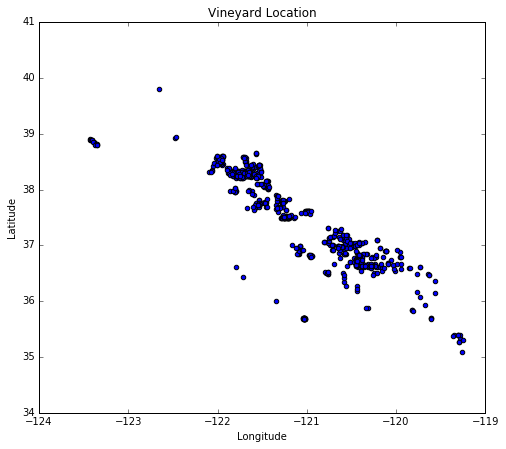

In [47]:
fig = plt.figure(figsize=(8,7))
plt.scatter(vineyard_location['long'], vineyard_location['lat'])
plt.title('Vineyard Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

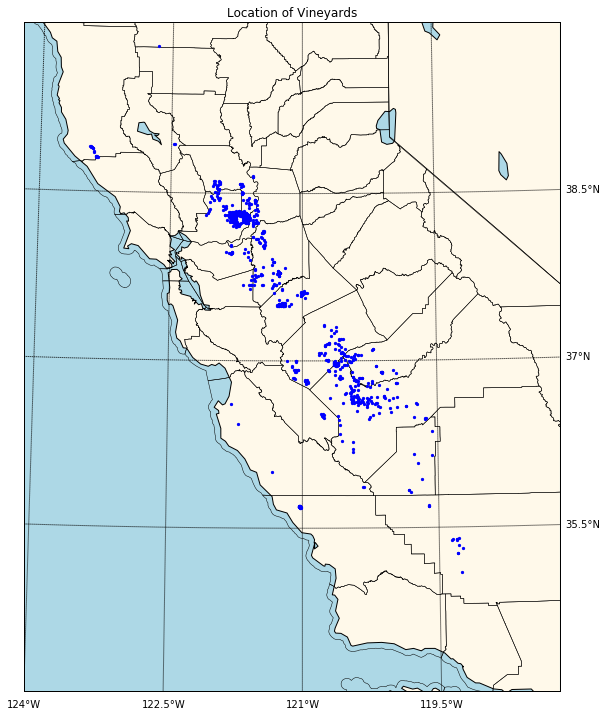

In [48]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(12,12))

map = Basemap(llcrnrlon=-124,llcrnrlat=34,urcrnrlon=-118,urcrnrlat=40,
             resolution='i', projection='tmerc', lat_0 = 37, lon_0 = -121)

map.drawmapboundary(fill_color='lightblue')
map.fillcontinents(color='#fff9ea',lake_color='lightblue')
map.drawcoastlines()

parallels = np.arange(34, 40, 1.5)
map.drawparallels(parallels, labels=[False,True,True,False])
meridians = np.arange(-124, -118, 1.5)
map.drawmeridians(meridians, labels=[True,False,False,True])

x1, y1 = map(vineyard_location['long'].values, vineyard_location['lat'].values)

map.scatter(x1, y1, marker='.',color='blue', zorder=10)
map.drawstates()
map.readshapefile('CaliforniaCounty', 'CaliforniaCounty')

plt.title("Location of Vineyards")
#plt.legend()
plt.show()

In [49]:
sub = deliveries[(deliveries['year'] == 2010) & (deliveries['varietal'] == 101)]
sub = sub.sort_values('crushdate')

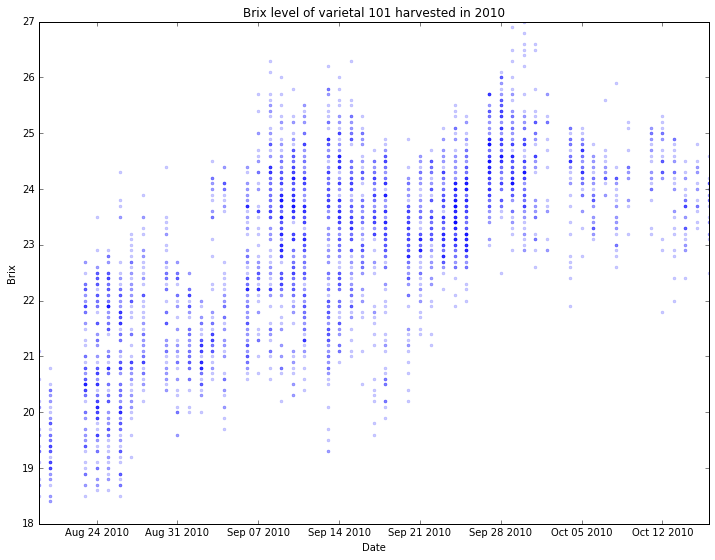

In [50]:
fig = plt.figure(figsize=(12,9))
plt.plot(sub['crushdate'], sub['brix'], '.b', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Brix')
plt.title('Brix level of varietal 101 harvested in 2010')
plt.show()

In [56]:
pblk_region = pd.DataFrame(columns=['pblk', 'region'])
i = 0
for key, df in climate.groupby(['pblk', 'region']):
    pblk_region.loc[i] = [key[0], key[1]]
    i += 1

In [57]:
d_r = pd.merge(deliveries, pblk_region, how="left", on='pblk')

In [58]:
d_r.head()

,weighttagno,tagyear,siteno,programno,crushdate,brix,tons,pblk,tier,varietal,origin,year,month,day,dayofweek,region
0,792954,1,8,GTV177CAL,2001-08-08,20.400000,1.8459,111735,GTV,177,CAL,2001,8,8,2,RIPDAN
1,792963,1,8,GTV177CAL,2001-08-08,20.200001,1.7955,111735,GTV,177,CAL,2001,8,8,2,RIPDAN
2,792967,1,8,GTV177CAL,2001-08-08,19.700001,1.7752,111735,GTV,177,CAL,2001,8,8,2,RIPDAN
3,792972,1,8,GTV177CAL,2001-08-08,19.900000,1.8914,111735,GTV,177,CAL,2001,8,8,2,RIPDAN
4,792980,1,8,GTV177CAL,2001-08-08,19.600000,1.7395,111735,GTV,177,CAL,2001,8,8,2,RIPDAN


In [72]:
d_r.to_csv('d_r.csv')

In [59]:
sub = d_r[(d_r['year'] == 2010) & (d_r['varietal'] == 101)]
sub = sub.sort_values('crushdate')
regions = sub['region'].unique()

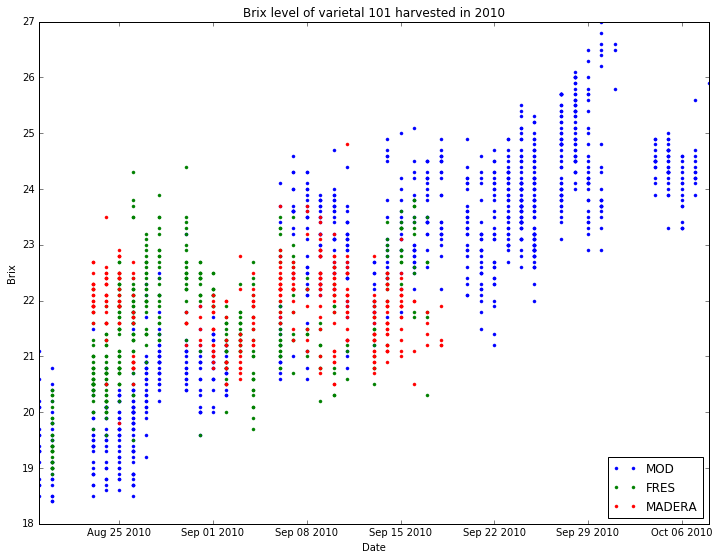

In [73]:
fig = plt.figure(figsize=(12,9))
for region in regions[:3]:
    subsub = sub[sub['region'] == region]
    plt.plot(subsub['crushdate'], subsub['brix'], '.', label=region)

plt.xlabel('Date')
plt.ylabel('Brix')
plt.legend(loc='lower right')
plt.title('Brix level of varietal 101 harvested in 2010')
plt.show()

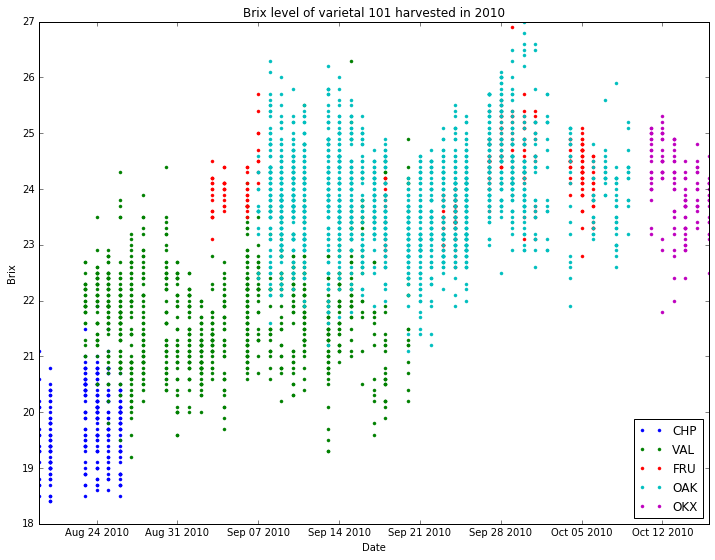

In [61]:
tiers = sub['tier'].unique()
fig = plt.figure(figsize=(12,9))
for tier in tiers[:6]:
    subsub = sub[sub['tier'] == tier]
    plt.plot(subsub['crushdate'], subsub['brix'], '.', label=tier)

plt.xlabel('Date')
plt.ylabel('Brix')
plt.legend(loc='lower right')
plt.title('Brix level of varietal 101 harvested in 2010')
plt.show()

In [69]:
groups = d_r[(d_r['varietal'] == 101) & (d_r['year'] == 2011)].groupby('region')
for region, df in groups:
    print(df['tier'].unique())

['OAK' 'FRU']
['OFX' 'OAK']
['VAL' 'CHP' 'BWS']
['OAK' 'FRU']
['VAL' 'OAK']
['CHP' 'BWS' 'OFX' 'VAL' 'OAK' 'FRU']
['OAK' 'VAL']
['VAL']


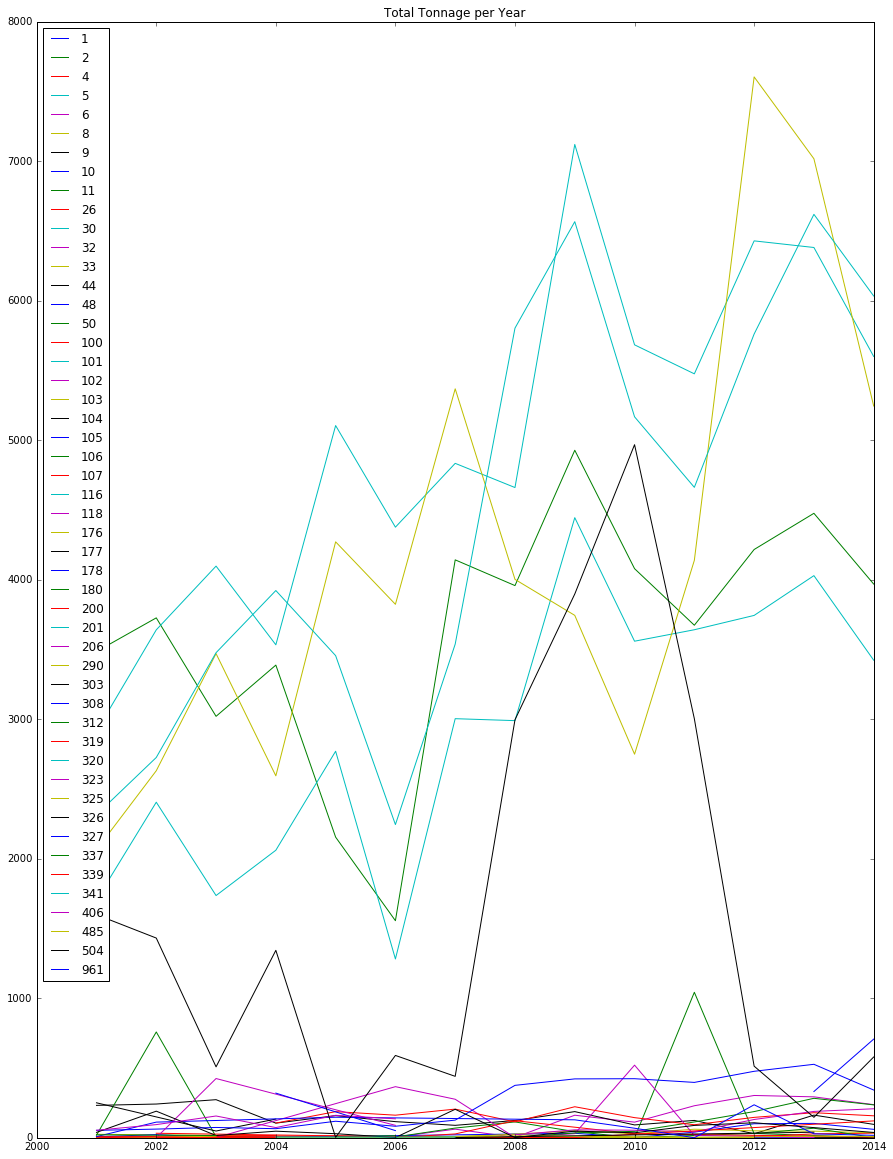

In [74]:
fig = plt.figure(figsize=(15,20))
#data = deliveries[deliveries['tier'] == 'JCE']
#data = deliveries[deliveries['pblk'] == 102411]
#groups = data.groupby(['year'])
groups = deliveries.groupby(['varietal'])
for key, df in groups:
    tons_per_day = pd.DataFrame(columns=['year', 'tons'])
    g = df.groupby(['year'])
    i = 0
    for k, d in g:
        tons_per_day.loc[i] = [k, d['tons'].sum()]
        i += 1
    #print('year', key ,':', tons_per_day['tons'].sum())
    #if tons_per_day['tons'].max() < 1000:
    plt.plot(tons_per_day['year'], tons_per_day['tons'], label=key)

plt.legend(loc='upper left')
plt.title('Total Tonnage per Year')
plt.show()

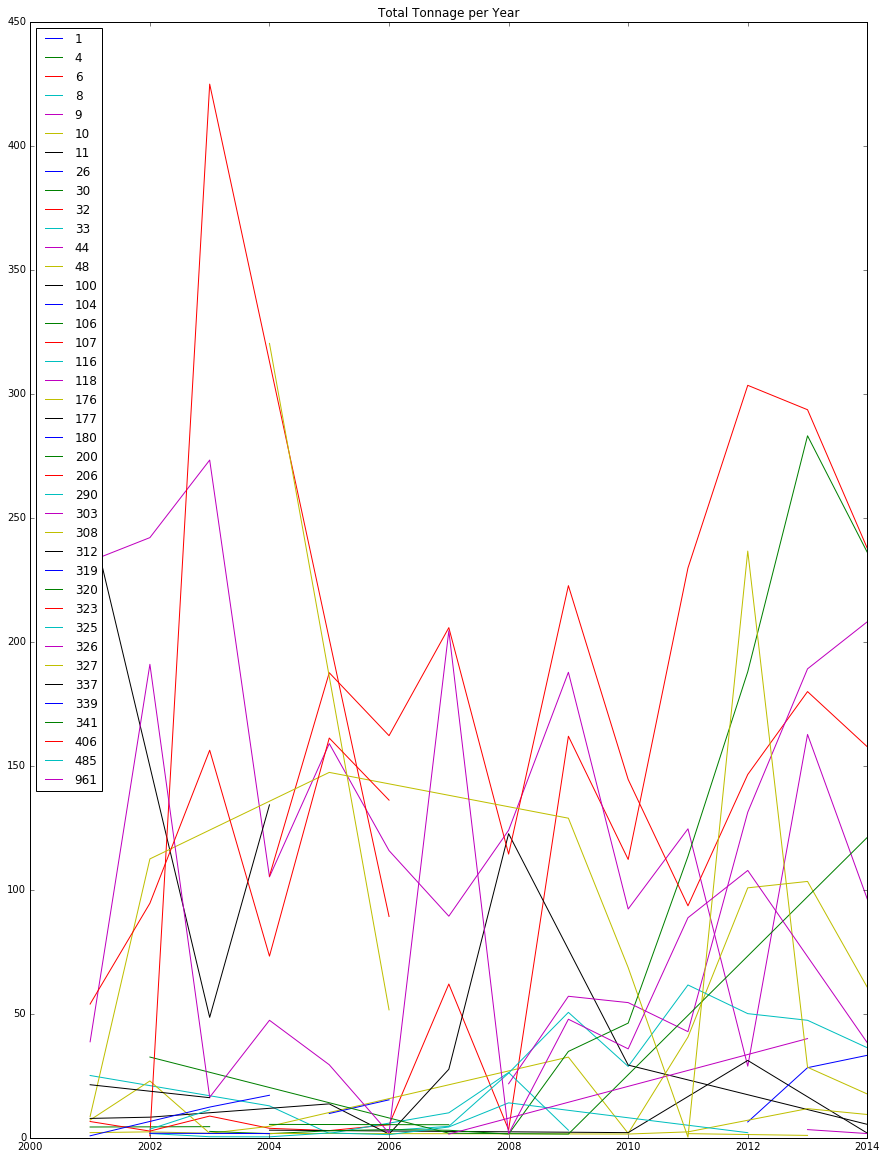

In [75]:
fig = plt.figure(figsize=(15,20))
#data = deliveries[deliveries['tier'] == 'JCE']
#data = deliveries[deliveries['pblk'] == 102411]
#groups = data.groupby(['year'])
groups = deliveries.groupby(['varietal'])
for key, df in groups:
    tons_per_day = pd.DataFrame(columns=['year', 'tons'])
    g = df.groupby(['year'])
    i = 0
    for k, d in g:
        tons_per_day.loc[i] = [k, d['tons'].sum()]
        i += 1
    #print('year', key ,':', tons_per_day['tons'].sum())
    if tons_per_day['tons'].max() < 500:
        plt.plot(tons_per_day['year'], tons_per_day['tons'], label=key)

plt.legend(loc='upper left')
plt.title('Total Tonnage per Year')
plt.show()

# Yields

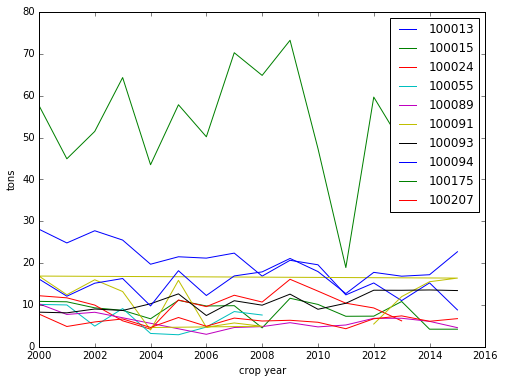

In [76]:
count = 0
grouped = yields.groupby('pblk')

fig=plt.figure(figsize=(8,6))
plt.xlabel('crop year')
plt.ylabel('tons')
for group, frame in grouped:
    if count < 10:
        plt.plot(frame['crop_year'], frame['tons'],label=group)
        plt.legend(loc='upper left',fontsize=6)
        count +=1
    else: 
        break
        
plt.legend()